# 4주차, 5일차 : 1-3주차 튜토리얼 작성하기
- ### Contents 
    1. Basic classification: Classify images of clothing : https://www.tensorflow.org/tutorials/keras/basic_classification
    2. Text classification with TensorFlow Hub: Movie reviews : https://www.tensorflow.org/tutorials/keras/basic_text_classification
    3. Basic regression: Predict fuel efficiency : https://www.tensorflow.org/tutorials/keras/basic_regression
    4. Build a linear model with Estimators : https://www.tensorflow.org/tutorials/estimator/linear
    5. Overfit And Underfit : https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
    6. Load CSV Data : https://www.tensorflow.org/tutorials/load_data/csv
    7. TFRecord and tf.Example : https://www.tensorflow.org/tutorials/load_data/tfrecord
    8. Save and load models : https://www.tensorflow.org/tutorials/keras/save_and_restore_models
    9. Better performance with the tf.data API: https://www.tensorflow.org/guide/data_performance
    10. Time Series Forecasting: https://www.tensorflow.org/tutorials/structured_data/time_series
    11. Text Classification with an RNN: https://www.tensorflow.org/tutorials/text/text_classification_rnn
    12. Distributed training with Keras: https://www.tensorflow.org/tutorials/distribute/keras



## 1. Basic classification: Classify images of clothing

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',
              'Bag', 'Ankel boot']

In [5]:
# Expore the data
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

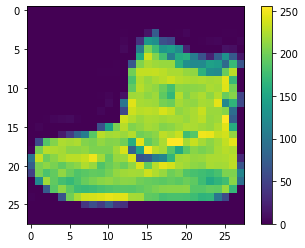

In [10]:
# preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0
test_images  = test_images  / 255.0

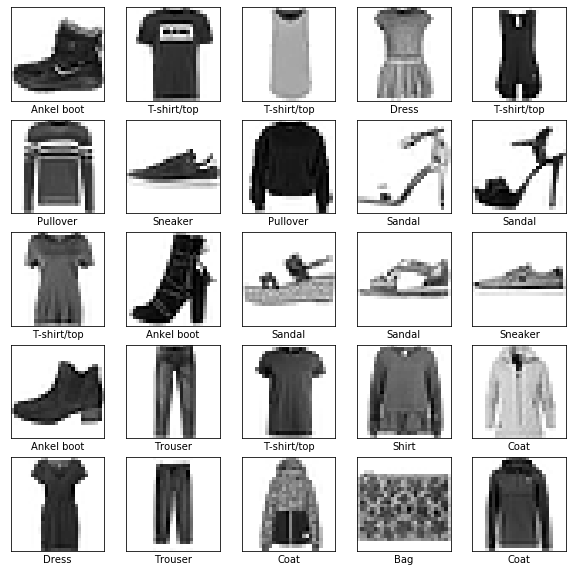

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
# Compile th model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5011 - accuracy: 0.8251
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3750 - accuracy: 0.8641
Epoch 3/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3371 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3123 - accuracy: 0.8857
Epoch 5/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2956 - accuracy: 0.8898
Epoch 6/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2804 - accuracy: 0.8975
Epoch 7/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2685 - accuracy: 0.9011
Epoch 8/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2578 - accuracy: 0.9040
Epoch 9/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2476 - accuracy: 0.9077
Epoch 10/10
60

In [19]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2271 - accuracy: 0.8776

Test accuracy: 0.8776


In [20]:
# Make predictions
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([5.8298190e-07, 1.6552447e-09, 4.4446889e-08, 6.2839067e-10,
       9.0370023e-08, 4.0225947e-04, 5.0931283e-07, 6.5332893e-03,
       5.0333283e-06, 9.9305809e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

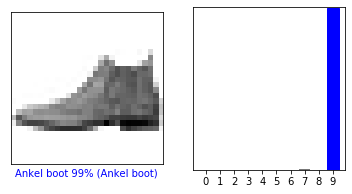

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

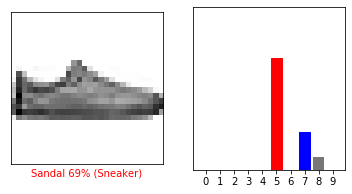

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

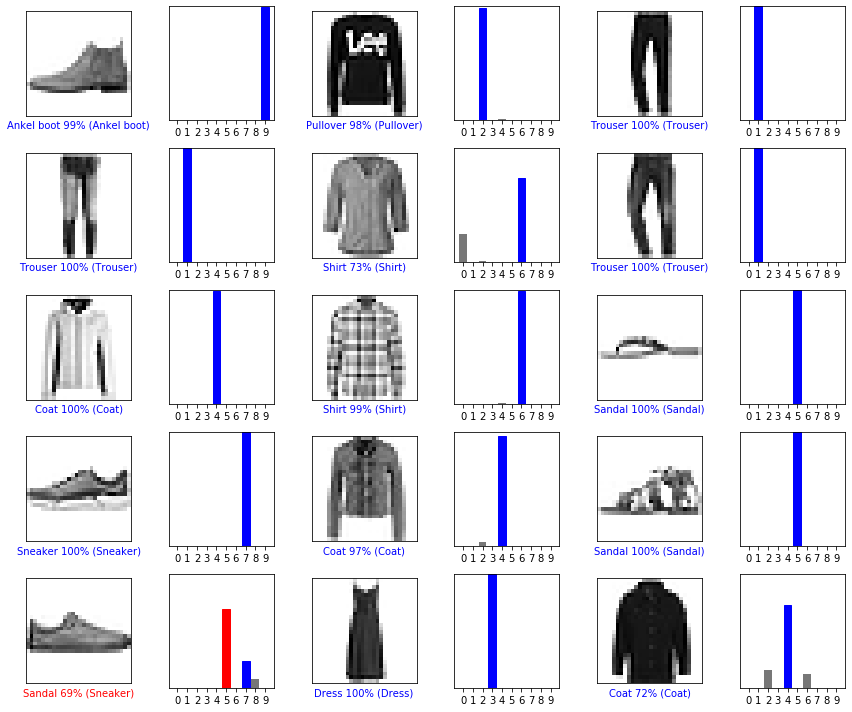

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [30]:
img = test_images[i]

print(img.shape)

(28, 28)


In [31]:
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [32]:
predictions_single = model.predict(img)

predictions_single

array([[1.7146957e-04, 7.6260811e-09, 1.5711071e-01, 3.5274017e-04,
        7.2422570e-01, 2.2666716e-11, 1.1799327e-01, 3.4181845e-11,
        1.4604765e-04, 1.7123806e-11]], dtype=float32)

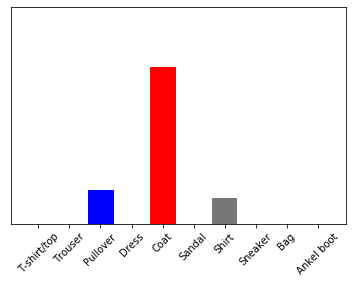

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])

4

## 2. Test classification with TensorFlow Hub: Movie reviews

In [36]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds

print('Version: ', tf.__version__)
print('Eager mode: ', tf.executing_eagerly())
print('Hub version: ', hub.__version__)
print('GPU is', 'avaliable' if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVALIABLE')

Version:  2.0.0
Eager mode:  True
Hub version:  0.7.0
GPU is avaliable


In [38]:
# Download the IMDB dataset
train_validation_split = tfds.Split.TRAIN.subsplit([6, 4])

(train_data, validation_data), test_data = tfds.load(
    name='imdb_reviews',
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True
)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /home/kyle/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [40]:
# Explore the data
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: id=58671, shape=(10,), dtype=string, numpy=
array([b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story

In [41]:
train_labels_batch

<tf.Tensor: id=58672, shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])>

In [42]:
# Build the model
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                          dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: id=58854, shape=(3, 20), dtype=float32, numpy=
array([[ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ],
       [ 3.4232912 , -4.230874  ,  4.1488533 , -0.29553518, -6.802391  ,
        -2.5163853 , -4.4002395 ,  1.905792  ,  4.7512794 , -0.40538004,
        -4.3401685 ,  1.0361497 ,  0.9744097 ,  0.71507156, -6.2657013 ,
         0.16533905,  4.560262  , -1.3106939 , -3.1121316 , -2.1338716 ],
       [ 3.8508697 , -5.003031  ,  4.8700504 , -0.04324996, -5.893603  ,
        -5.2983093 , -4.004676  ,  4.1236343 ,  6.267754  ,  0.11632943,
        -3.5934832 ,  0.8023905 ,  0.56146765,  0.9192484 , -7.3066816 ,
         2.8202746 ,  6.2000837 , -3.5709393 , -4.564525  , -2.305622  ]],
      dtype=float32)>

In [43]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Loss function and optimizer
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [47]:
# Train the model
history = model.fit(train_data.shuffle(10000).batch(512),
                   epochs=20,
                   validation_data=validation_data.batch(512),
                   verbose=1)

Epoch 1/20
30/30 [==============================] - 2s 68ms/step - loss: 0.6376 - accuracy: 0.6391 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 2s 66ms/step - loss: 0.5977 - accuracy: 0.6873 - val_loss: 0.5815 - val_accuracy: 0.7012
Epoch 3/20
30/30 [==============================] - 2s 66ms/step - loss: 0.5574 - accuracy: 0.7251 - val_loss: 0.5458 - val_accuracy: 0.7324
Epoch 4/20
30/30 [==============================] - 2s 66ms/step - loss: 0.5194 - accuracy: 0.7561 - val_loss: 0.5125 - val_accuracy: 0.7554
Epoch 5/20
30/30 [==============================] - 2s 64ms/step - loss: 0.4833 - accuracy: 0.7839 - val_loss: 0.4753 - val_accuracy: 0.7793
Epoch 6/20
30/30 [==============================] - 2s 65ms/step - loss: 0.4396 - accuracy: 0.8103 - val_loss: 0.4411 - val_accuracy: 0.7982
Epoch 7/20
30/30 [==============================] - 2s 66ms/step - loss: 0.4029 - accuracy: 0.8296 - val_loss: 0.4118 - val_accuracy: 0.8162
Epoch

In [48]:
# Evaluate the model
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
    print('%s: %.3f' % (name, value))

49/49 - 1s - loss: 0.3184 - accuracy: 0.8657
loss: 0.318
accuracy: 0.866


## 3. Basic regression: Predict fuel efficiency

In [49]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [50]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [75]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [53]:
# The Auto MPG dataset
# Get the data
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 5us/step


'/home/kyle/.keras/datasets/auto-mpg.data'

In [55]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
               'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                         na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [57]:
# Clean the data
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [58]:
dataset = dataset.dropna()

In [60]:
dataset['Origin'] = dataset['Origin'].map(lambda x : {1:'USA', 2:'Europe', 3:'Japan'}.get(x))

/home/kyle/kyle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [62]:
# Split the data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset  = dataset.drop(train_dataset.index)

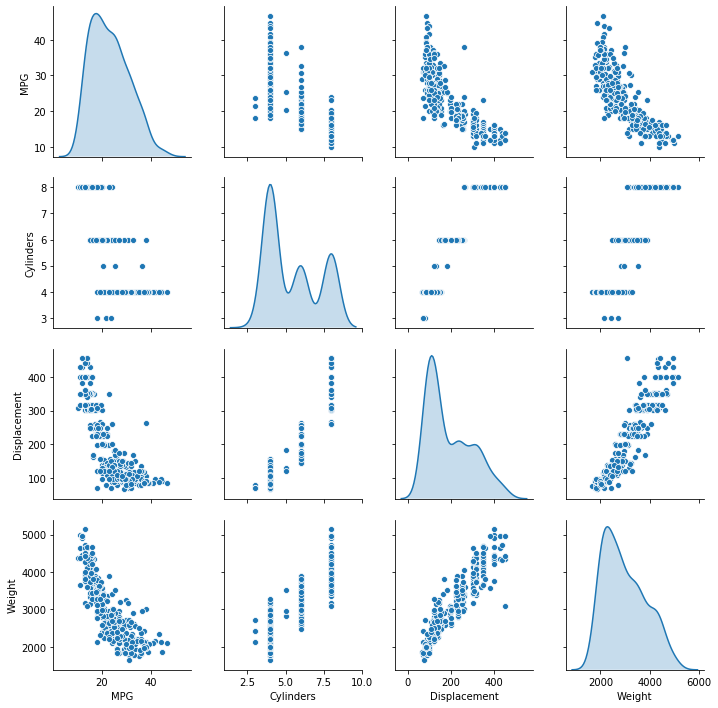

In [63]:
# Inspect the data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [64]:
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [65]:
# Split features from labels

In [66]:
train_labels = train_dataset.pop('MPG')
test_labels  = test_dataset.pop('MPG')

In [67]:
# Normalize the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data  = norm(test_dataset)

In [68]:
# The model 
# Build the model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae', 'mse'])
    return model

In [69]:
model = build_model()

In [70]:
# Inspect the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [72]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.0341101 ],
       [-0.08380293],
       [-0.09789044],
       [ 0.17603835],
       [-0.5676008 ],
       [ 0.01979059],
       [-0.55284166],
       [ 0.14364763],
       [ 0.01373621],
       [-0.27614132]], dtype=float32)

In [76]:
# Train the model
EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()]
)


Epoch: 0, loss:568.3164,  mae:22.4897,  mse:568.3163,  val_loss:557.9405,  val_mae:22.1665,  val_mse:557.9405,  
....................................................................................................
Epoch: 100, loss:5.9016,  mae:1.6777,  mse:5.9016,  val_loss:8.8979,  val_mae:2.2908,  val_mse:8.8979,  
....................................................................................................
Epoch: 200, loss:5.3681,  mae:1.6021,  mse:5.3681,  val_loss:8.8388,  val_mae:2.2923,  val_mse:8.8388,  
....................................................................................................
Epoch: 300, loss:4.8767,  mae:1.4789,  mse:4.8767,  val_loss:8.9085,  val_mae:2.2625,  val_mse:8.9085,  
....................................................................................................
Epoch: 400, loss:4.5930,  mae:1.4295,  mse:4.5930,  val_loss:9.3142,  val_mae:2.3042,  val_mse:9.3142,  
..............................................................

In [77]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.748811,1.032444,2.748811,9.309178,2.259207,9.309179,995
996,2.841644,1.095790,2.841645,9.827765,2.316715,9.827765,996
997,2.745003,1.080524,2.745003,9.949035,2.384841,9.949035,997
998,2.964046,1.139618,2.964046,10.136973,2.361124,10.136972,998
999,2.673260,1.068528,2.673260,9.619787,2.302069,9.619787,999


In [78]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

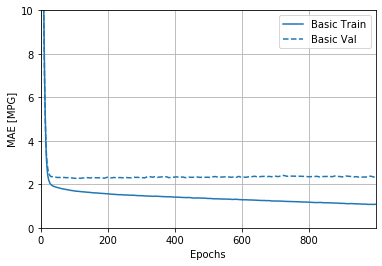

In [79]:
plotter.plot({'Basic': history}, metric='mae')
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

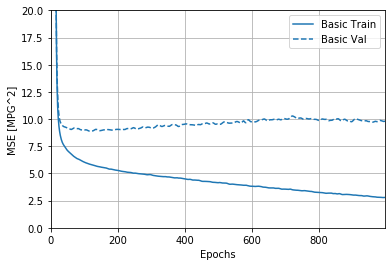

In [81]:
plotter.plot({'Basic': history}, metric='mse')
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [82]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels,
                         epochs=EPOCHS, validation_split=0.2, verbose=0,
                         callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:572.7111,  mae:22.6534,  mse:572.7111,  val_loss:569.3892,  val_mae:22.5156,  val_mse:569.3892,  
....................................................

Text(0, 0.5, 'MAE [MPG]')

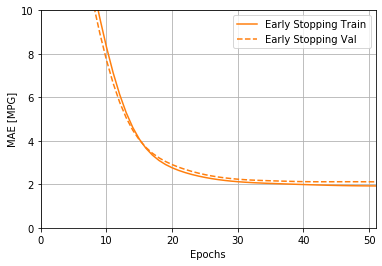

In [83]:
plotter.plot({'Early Stopping': early_history}, metric='mae')
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [85]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error: {:5.2f} MPG'.format(mae))

78/78 - 0s - loss: 5.9719 - mae: 1.9046 - mse: 5.9719
Testing set Mean Abs Error:  1.90 MPG


In [86]:
# Make predictions

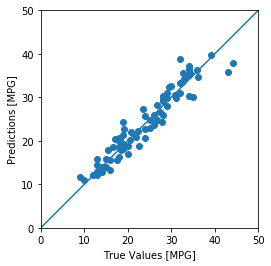

In [88]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

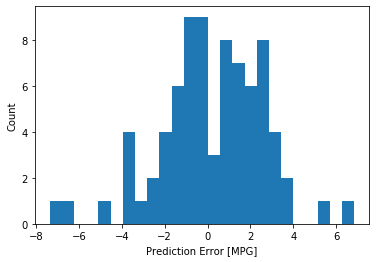

In [90]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

## 4. Build a linear model with Estimators

In [91]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

In [92]:
# Load the titanic dataset
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [93]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [94]:
# Explore the data
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [95]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [96]:
dftrain.shape[0], dfeval.shape[0]

(627, 264)

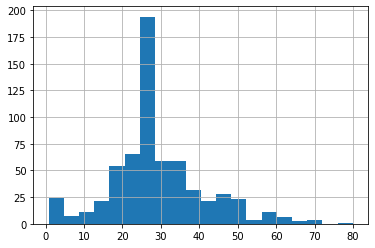

In [97]:
dftrain.age.hist(bins=20)

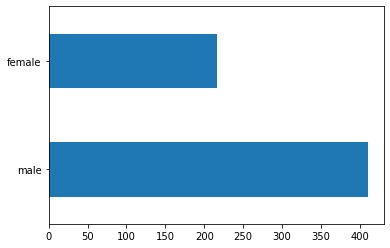

In [98]:
dftrain.sex.value_counts().plot(kind='barh')

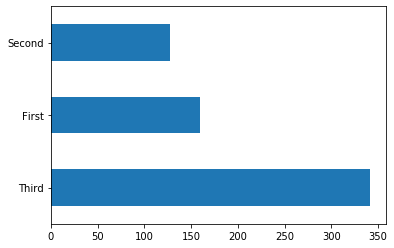

In [100]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

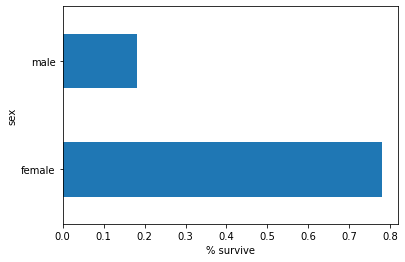

In [102]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [106]:
# Feature Engineering for the Model
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                      'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, 
                                                                                    vocabulary))
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [107]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn  = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [109]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
    print('Some feature keys:', list(feature_batch.keys()))
    print()
    print('A batch of class:', feature_batch['class'].numpy())
    print()
    print('A batch of Labels:', label_batch.numpy())

Some feature keys: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

A batch of class: [b'Third' b'Third' b'Third' b'Third' b'Third' b'Second' b'Third' b'Third'
 b'First' b'Third']

A batch of Labels: [0 0 0 0 0 0 0 0 1 1]


In [110]:
age_column = feature_columns[7]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[16.],
       [20.],
       [28.],
       [20.],
       [ 9.],
       [35.],
       [25.],
       [28.],
       [25.],
       [28.]], dtype=float32)

In [111]:
gender_column = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_column)])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [112]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.74242425, 'accuracy_baseline': 0.625, 'auc': 0.8343128, 'auc_precision_recall': 0.7910043, 'average_loss': 0.47925597, 'label/mean': 0.375, 'loss': 0.4731649, 'precision': 0.64761907, 'prediction/mean': 0.41400725, 'recall': 0.68686867, 'global_step': 200}


In [113]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)

In [114]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.780303, 'accuracy_baseline': 0.625, 'auc': 0.84943366, 'auc_precision_recall': 0.78904283, 'average_loss': 0.47289425, 'label/mean': 0.375, 'loss': 0.4649236, 'precision': 0.7356322, 'prediction/mean': 0.3310435, 'recall': 0.64646465, 'global_step': 200}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp890_w9dc/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmp890_w9dc/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


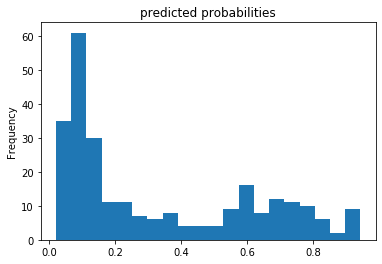

In [116]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

(0, 1.05)

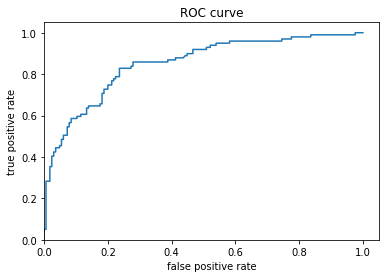

In [117]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)